<a href="https://colab.research.google.com/github/Kiro-tagama/pokemon_IA_predicao/blob/main/Projeto_A3_Pok%C3%A9mon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de IA
---
Projeto de IA intruido pelos professores da USJT Carlos Menezes e Marcelo Duduchi 

---
descrição do **projeto**:
- BD: All Pokemons 
[kaggle.com](https://www.kaggle.com/maca11/all-pokemon-dataset)
- objetivo: catch reat (capturabilidade)
---
membros:
* Alexandres Cerqueira
* Guilherme Vaz Oliveira
* Henrique de Freitas Pereira
* Rodrigo Lopes

# Import (principal)
- importando a tabela

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [ ]:
#Vendo e lendo as colunas que estão disponiveis
!wget https://drive.google.com/u/2/uc?id=1z8h-_fmbZS7zyeppM5dYnxB80z6b8xsy&export=download
!mv uc* All_Pokemon.csv
pkm = pd.read_csv('All_Pokemon.csv')
pkm.columns 

--2021-11-19 13:51:18--  https://drive.google.com/u/2/uc?id=1z8h-_fmbZS7zyeppM5dYnxB80z6b8xsy
Resolving drive.google.com (drive.google.com)... 74.125.142.100, 74.125.142.101, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-78-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m06cdm4u2fabj53g2k42ctjsms8tmkbc/1637329875000/14261872243918006039/*/1z8h-_fmbZS7zyeppM5dYnxB80z6b8xsy [following]
--2021-11-19 13:51:18--  https://doc-0s-78-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m06cdm4u2fabj53g2k42ctjsms8tmkbc/1637329875000/14261872243918006039/*/1z8h-_fmbZS7zyeppM5dYnxB80z6b8xsy
Resolving doc-0s-78-docs.googleusercontent.com (doc-0s-78-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-0s-78-docs.googleusercontent.com (doc-0s-78-docs.googleusercontent.com)|74

Index(['Number', 'Name', 'Type 1', 'Type 2', 'Abilities', 'HP', 'Att', 'Def',
       'Spa', 'Spd', 'Spe', 'BST', 'Mean', 'Standard Deviation', 'Generation',
       'Experience type', 'Experience to level 100', 'Final Evolution',
       'Catch Rate', 'Legendary', 'Mega Evolution', 'Alolan Form',
       'Galarian Form', 'Against Normal', 'Against Fire', 'Against Water',
       'Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting',
       'Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic',
       'Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon',
       'Against Dark', 'Against Steel', 'Against Fairy', 'Height', 'Weight',
       'BMI'],
      dtype='object')

In [ ]:
# Visualizar o começo da base de dados.
pkm.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,405,67.500000,8.902247,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,525,87.500000,8.902247,1.0,Medium Slow,1059860,1.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


**Informação sobre cada coluna da planilha:**

---

**Number:** Número do pokémon de acordo com a pokedex

**Name:** Nome do pokémon

**Type 1:** Tipo primário do pokémon

**Type 2:** Tipo secundário do pokémon (se houver)

**Abilities:** Uma lista das habilidades do pokémon

**HP:** Pontos de vida base do pokémon

**Att:** Pontos de ataque base do pokémon

**Def:** Pontos de defesa base do pokémon

**Spa:** Pontos de super ataque base do pokémon

**Spd:** Pontos de super defesa base do pokémon

**Spe:** Pontos de velocidade base do pokémon

**BST:** Soma de todos os status base

**Mean:** Média dos status base

**Standard Deviation:** Desvio padrão dos status base

**Generation:** A geração em que o pokémon foi introduzido

**Experience Type:** Tipo de experiência do pokémon

**Experience to level 100:** Quantidade de experiência que o pokémon precisa para chegar no nível 100

**Final Evolution:** Demonstra se o pokémon é a evolução

**Catch Rate:** Chance de capturar o pokémon

**Legendary:** Demonstra se o pokémon é lendário

**Mega Evolution:** Demonstra se o pokémon é uma mega evolução

**Alolan Form:** Demonstra se o pokémon é uma forma de Alola

**Galarian Form:** Demonstra se o pokémon é uma forma de Galarian

**Against { }:** Efetividade contra certos tipos de pokémon

# Filtragem
- transformando o Catch Rate em níveis
- transformando o type 1 em numeros
- correlação com o Catch Rate
- eliminando aquilo que não será utilizado  
- definição de alvo

In [ ]:
pkm.rename(columns= {'Catch Rate': 'CatchRate'}, inplace = True)

In [ ]:
pkm.groupby(by='CatchRate').size() # 34 tipos  
#pkm['Catch Rate'].value_counts() mesmo comando

CatchRate
3       96
10       4
15       1
25      13
30      26
35       1
45     337
50       9
55       3
60      68
65       3
70       5
75      75
80       2
90      48
100      7
120     67
125      3
127      8
130      2
140      6
145      1
150      8
155      1
160      1
170      2
180     13
190     84
200     20
205      1
220      2
225     15
235      8
255     92
dtype: int64

34 tipos divididos pela metade (fácil e difícil)

(< 120 -> Difícil)

(> 120 -> Fácil)


In [ ]:
def converterPegabilidade(x):
  if x < 120: return 1
  else: return 2

In [ ]:
pkm['CatchRate'] = pkm.apply(lambda x: converterPegabilidade(x['CatchRate']), axis=1)

In [ ]:
pkm.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,CatchRate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,1,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,405,67.500000,8.902247,1.0,Medium Slow,1059860,0.0,1,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,525,87.500000,8.902247,1.0,Medium Slow,1059860,1.0,1,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,1,0.0,1.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,1,0.0,0.0,0.0,0.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [ ]:
pkm.groupby(by='CatchRate').size() # 34 tipos  #pkm['Catch Rate'].value_counts() mesmo comando

CatchRate
1    698
2    334
dtype: int64

In [ ]:
# Conversor do tipo de Pokémon para um numero ordenado.
pkm['Type 1'] = pkm.apply(lambda row: 0 if 'Bug' in row['Type 1'] 
                               else 1 if 'Dark' in row['Type 1'] 
                               else 2 if 'Dragon' in row['Type 1']                     
                               else 3 if 'Eletric' in row['Type 1']                 
                               else 4 if 'Fairy' in row['Type 1']                
                               else 5 if 'Fighting' in row['Type 1'] 
                               else 6 if 'Fire' in row['Type 1'] 
                               else 7 if 'Flying' in row['Type 1'] 
                               else 8 if 'Ghost' in row['Type 1']                      
                               else 9 if 'Grass' in row['Type 1']                   
                               else 10 if 'Ground' in row['Type 1']                  
                               else 11 if 'Ice' in row['Type 1'] 
                               else 12 if 'Normal' in row['Type 1'] 
                               else 13 if 'Poison' in row['Type 1'] 
                               else 14 if 'Psychic' in row['Type 1']                       
                               else 15 if 'Rock' in row['Type 1']                  
                               else 16 if 'Steel' in row['Type 1']                   
                               else 17 if 'Water' in row['Type 1']                                          
                               else 20, axis=1)

In [ ]:
#Verificando como ficou o começo agora
pkm.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,CatchRate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,9,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,1,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,9,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,405,67.500000,8.902247,1.0,Medium Slow,1059860,0.0,1,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,9,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,525,87.500000,8.902247,1.0,Medium Slow,1059860,1.0,1,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,9,Poison,['Thick Fat'],80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,1,0.0,1.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,6,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,1,0.0,0.0,0.0,0.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


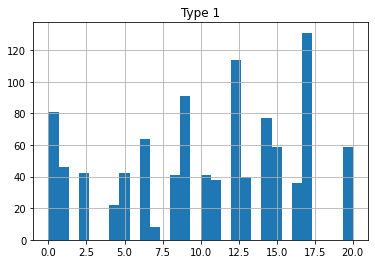

In [ ]:
#Informa a quantidade de Especimes dentro da base de dados.
pkm.hist(column='Type 1',bins = 30)
plt.show()

In [ ]:
#Excluindo colunas que não são necessarias
pkm.drop(['Abilities', 'BST', 'Experience type', 'Type 2'], axis=1, inplace=True)


Fizemos a correlação com o Catch Rate para tentar ver quais colunas tinham mais:

In [ ]:
from scipy.stats import pearsonr
chaves = ['Type 1', 'HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe', 'Mean', 'Standard Deviation', 'Generation', 'Experience to level 100', 'Final Evolution', 'Legendary', 'Mega Evolution', 'Alolan Form', 'Against Normal', 'Against Fire', 'Against Water', 'Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting', 'Against Poison','Against Ground', 'Against Flying', 'Against Psychic', 'Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon', 'Against Dark', 'Against Steel', 'Against Fairy', 'Height', 'Weight', 'BMI']
for chave in chaves:
  corr, _ = pearsonr(pkm['CatchRate'], pkm[chave])
  print('CatchRate - ', chave, ': correlação: %.2f' % corr)
  
  #Mean
  #Final Evolution
  #Legendary
  #Att
  #Spa
  #Spd
  #HP
  

CatchRate -  Type 1 : correlação: -0.00
CatchRate -  HP : correlação: -0.42
CatchRate -  Att : correlação: -0.49
CatchRate -  Def : correlação: -0.42
CatchRate -  Spa : correlação: -0.47
CatchRate -  Spd : correlação: -0.48
CatchRate -  Spe : correlação: -0.38
CatchRate -  Mean : correlação: -0.67
CatchRate -  Standard Deviation : correlação: -0.29
CatchRate -  Generation : correlação: -0.06
CatchRate -  Experience to level 100 : correlação: -0.13
CatchRate -  Final Evolution : correlação: -0.60
CatchRate -  Legendary : correlação: -0.23
CatchRate -  Mega Evolution : correlação: -0.14
CatchRate -  Alolan Form : correlação: 0.05
CatchRate -  Against Normal : correlação: 0.09
CatchRate -  Against Fire : correlação: 0.06
CatchRate -  Against Water : correlação: -0.00
CatchRate -  Against Electric : correlação: -0.02
CatchRate -  Against Grass : correlação: 0.01
CatchRate -  Against Ice : correlação: -0.02
CatchRate -  Against Fighting : correlação: -0.01
CatchRate -  Against Poison : corr

Vamos ficar com as que mais tem correlação:
*   Mean
*   Final Evolution
*   Legendary
*   HP
*   Att
*   Def
*   Spa
*   Spd








In [ ]:
#Removendo as outras colunas que não tem muita correlação:
pkm.drop(['Number', 'Type 1', 'Name', 'Spe', 'Standard Deviation', 'Generation', 'Experience to level 100', 'Mega Evolution', 'Alolan Form', 'Galarian Form', 'Against Normal', 'Against Fire', 'Against Water', 'Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting', 'Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic', 'Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon', 'Against Dark', 'Against Steel', 'Against Fairy', 'Weight', 'Height', 'BMI'], axis=1, inplace= True)

In [ ]:
#Verificando as que sobraram
pkm.columns

Index(['HP', 'Att', 'Def', 'Spa', 'Spd', 'Mean', 'Final Evolution',
       'CatchRate', 'Legendary'],
      dtype='object')

Definindo a target Catch Rate:

In [ ]:
target = pkm['CatchRate']

data = pkm.drop (['CatchRate'], axis = 1)

In [ ]:
#para fazer o treino, resolvemos deixar 65% para treinamento e 35% para teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)

# Classificadores
- arvore de decisão
- regressão logística
- knn
- svm

In [ ]:
from sklearn import tree
import graphviz
import sklearn.metrics as metrics

In [ ]:
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
t = t.fit(X_train, y_train)
predictions = t.predict(X_test)
print(predictions) 

[1 2 2 2 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 2 1 1 1 2 2 2 1 1 1 1 2 1 2 1 1 2 2 1 1
 1 2 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 2 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1
 2 2 1 1 2 2 1 2 1 1 1 1 1 1 2 2 2 1 1 1 2 1 2 2 1 1 1 1 1 2 1 1 1 1 2 2 2
 1 1 2 1 2 1 1 2 2 2 1 1 1 1 2 2 2 1 1 1 2 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2
 1 1 2 2 1 1 1 1 1 2 1 2 2 1 1 1 2 2 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 2 2 1 1
 1 2 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 1 1 1 1 2 1 1 2 2 2 2 1]


In [ ]:
# APLICANDO O ALGORITMO DE ÁRVORE DE DECISÃO #
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X_train, y_train)
predictionsTree = clf.predict(X_test)
print("\nMatriz de confusão detalhada:\n", pd.crosstab(y_test, predictionsTree, rownames=['Real'], colnames= ['Predito'], margins=True, margins_name='Todos'))

dic_ARD = metrics.classification_report(y_test, predictionsTree, target_names=['Difícil', 'Fácil'],output_dict=True)
result_ARD = dic_ARD['accuracy']
print("\nAcurácia da Árvore de decisão: ", result_ARD *100, '%')

# MOSTRANDO OS RESULTADOS DO ALGORITMO DE ÁRVORE DE DECISÃO #
print("\nRelatório sobre a qualidade:\n")
print(metrics.classification_report(y_test, predictionsTree, target_names=['Díficil', 'Fácil']))


Matriz de confusão detalhada:
 Predito    1    2  Todos
Real                    
1        227   28    255
2         22   85    107
Todos    249  113    362

Acurácia da Árvore de decisão:  86.1878453038674 %

Relatório sobre a qualidade:

              precision    recall  f1-score   support

     Díficil       0.91      0.89      0.90       255
       Fácil       0.75      0.79      0.77       107

    accuracy                           0.86       362
   macro avg       0.83      0.84      0.84       362
weighted avg       0.86      0.86      0.86       362



In [ ]:
# APLICANDO O ALGORITMO DE REGRESSÃO LOGÍSTICA #
from sklearn.linear_model import LogisticRegression
modeloRL = LogisticRegression(solver='lbfgs',max_iter=5000)
modeloRL = modeloRL.fit(X_train, y_train)
predictionsRL = modeloRL.predict(X_test)

# MOSTRANDO OS RESULTADOS DO ALGORITMO DE REGRESSÃO LOGÍSTICA #

print("\nMatriz de confusão detalhada de Regressão Logística:\n",
      pd.crosstab(y_test, predictionsRL, rownames=['Real'], colnames=['Predito'],
      margins=True, margins_name='Todos'))

#from sklearn.metrics import classification_report
#print(classification_report(y_test,predictionsARV))

dic_RL = metrics.classification_report(y_test, predictionsRL, target_names=['Difícil', 'Fácil'],output_dict=True)
result_RL = dic_RL['accuracy']
print("\nAcurácia da Regressão Logística: ", result_RL *100, '%')


Matriz de confusão detalhada de Regressão Logística:
 Predito    1    2  Todos
Real                    
1        232   23    255
2         22   85    107
Todos    254  108    362

Acurácia da Regressão Logística:  87.56906077348067 %


In [ ]:
# APLICANDO O ALGORITMO KNN #

from sklearn.neighbors import KNeighborsClassifier

modeloKNN = KNeighborsClassifier(n_neighbors=3)
modeloKNN.fit(X_train, y_train)
predictionsKNN = modeloKNN.predict(X_test)

# MOSTRANDO OS RESULTADOS DO ALGORITMO KNN #

print("\nMatriz de confusão detalhada do KNN:\n",
      pd.crosstab(y_test, predictionsKNN, rownames=['Real'], colnames=['Predito'],
      margins=True, margins_name='Todos'))

dic_knn = metrics.classification_report(y_test, predictionsKNN, target_names=['Díficil', 'Fácil'],output_dict=True)
result_knn = dic_knn['accuracy']
print("\nAcurácia do KNN: ", result_knn *100, '%')


Matriz de confusão detalhada do KNN:
 Predito    1    2  Todos
Real                    
1        227   28    255
2         32   75    107
Todos    259  103    362

Acurácia do KNN:  83.42541436464089 %


In [ ]:
# APLICANDO ALGORITMO SVM #

from sklearn import svm

modelosvm = svm.SVC()
modelosvm.fit(X_train, y_train)

predictionsSVM = modelosvm.predict(X_test)

# MOSTRANDO O ALGORITMO SVM #

print("\nMatriz de confusão detalhada do SVM:\n",
      pd.crosstab(y_test, predictionsSVM, rownames=['Real'], colnames=['Predito'],
      margins=True, margins_name='Todos'))

dic_svm = metrics.classification_report(y_test, predictionsSVM, target_names=['Díficil', 'Fácil'],output_dict=True)
result_svm = dic_svm['accuracy']
print("\nAcurácia do SVM: ", result_svm *100, '%')


Matriz de confusão detalhada do SVM:
 Predito    1    2  Todos
Real                    
1        231   24    255
2         20   87    107
Todos    251  111    362

Acurácia do SVM:  87.84530386740332 %


# Rede neural

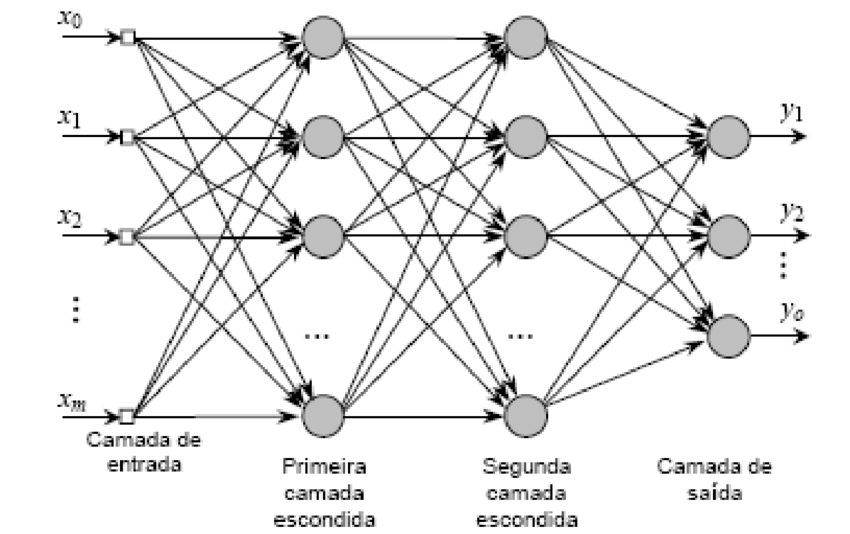

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,50,25,12),activation='relu', random_state=1)
clf.fit(X_train, y_train)
predictionRN = clf.predict(X_test)

In [ ]:
print('Relatório:\n',classification_report(y_test,predictionRN,target_names=['Fácil','Difícil']))

Relatório:
               precision    recall  f1-score   support

       Fácil       0.90      0.87      0.88       248
     Difícil       0.74      0.78      0.76       114

    accuracy                           0.84       362
   macro avg       0.82      0.83      0.82       362
weighted avg       0.85      0.84      0.84       362



In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50,20,10), activation='relu', random_state=1)
clf.fit(X_train, y_train)
predictionRN = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print('Relatório:\n',classification_report(y_test,predictionRN,target_names=['Fácil','Difícil']))

Relatório:
               precision    recall  f1-score   support

       Fácil       0.84      0.90      0.87       248
     Difícil       0.74      0.64      0.69       114

    accuracy                           0.82       362
   macro avg       0.79      0.77      0.78       362
weighted avg       0.81      0.82      0.81       362



## SMOTE

In [ ]:
X = pkm.drop("CatchRate", axis = 1)
y = pkm.CatchRate

In [ ]:
np.bincount(y)

array([  0, 698, 334])

In [ ]:
oversample = SMOTE()

In [ ]:
X, y = oversample.fit_resample(X, y)

In [ ]:
np.bincount(y)

array([  0, 698, 698])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [ ]:
#Arvore de Decisão
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X_train, y_train)
predictionsTree = clf.predict(X_test)

#Regressão Logística
modeloRL = LogisticRegression(solver='lbfgs',max_iter=5000)
modeloRL = modeloRL.fit(X_train, y_train)
predictionsRL = modeloRL.predict(X_test)

#KNN
modeloKNN = KNeighborsClassifier(n_neighbors=3)
modeloKNN.fit(X_train, y_train)
predictionsKNN = modeloKNN.predict(X_test)

#SVM
modelosvm = svm.SVC()
modelosvm.fit(X_train, y_train)
predictionsSVM = modelosvm.predict(X_test)

#Rede neural
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,50,25,12),activation='relu', random_state=1)
clf.fit(X_train, y_train)
predictionRN = clf.predict(X_test)

from sklearn.metrics import classification_report
print('\nRelatório Árvore Decisão:\n',classification_report(y_test,predictionsTree))
print('\nRelatório KNN:\n',classification_report(y_test,predictionsKNN))
print('\nRelatório SVM:\n',classification_report(y_test,predictionsSVM))
print('\nRelatório Regressão Logística:\n',classification_report(y_test,predictionsRL))
print('\nRelatório Rede Neural:\n',classification_report(y_test,predictionRN))




Relatório Árvore Decisão:
               precision    recall  f1-score   support

           1       0.91      0.90      0.91       174
           2       0.90      0.91      0.91       175

    accuracy                           0.91       349
   macro avg       0.91      0.91      0.91       349
weighted avg       0.91      0.91      0.91       349


Relatório KNN:
               precision    recall  f1-score   support

           1       0.93      0.87      0.90       174
           2       0.88      0.93      0.91       175

    accuracy                           0.90       349
   macro avg       0.90      0.90      0.90       349
weighted avg       0.90      0.90      0.90       349


Relatório SVM:
               precision    recall  f1-score   support

           1       0.92      0.87      0.89       174
           2       0.88      0.92      0.90       175

    accuracy                           0.89       349
   macro avg       0.90      0.89      0.89       349
weighted avg

# Comitê

In [ ]:
from collections import Counter
predictionsComite = []
for i in range(len(predictionsTree)):
  comite = []
  comite.append(predictionsTree[i])
  comite.append(predictionsKNN[i])
  comite.append(predictionsSVM[i])
  comite.append(predictionsRL[i])
  c = Counter(comite)
  value, count = c.most_common()[0]
  predictionsComite.append(value)
predictionsCom = np.array(predictionsComite)

In [ ]:
print('\nRelatório Árvore Decisão:\n',classification_report(y_test,predictionsTree))
print('\nRelatório KNN:\n',classification_report(y_test,predictionsKNN))
print('\nRelatório SVM:\n',classification_report(y_test,predictionsSVM))
print('\nRelatório Regressão Logística:\n',classification_report(y_test,predictionsRL))
print('\nRelatório Rede Neural:\n',classification_report(y_test,predictionRN))
print('\nRelatório Cômite:\n',classification_report(y_test,predictionsCom))


Relatório Árvore Decisão:
               precision    recall  f1-score   support

           1       0.91      0.90      0.91       174
           2       0.90      0.91      0.91       175

    accuracy                           0.91       349
   macro avg       0.91      0.91      0.91       349
weighted avg       0.91      0.91      0.91       349


Relatório KNN:
               precision    recall  f1-score   support

           1       0.93      0.87      0.90       174
           2       0.88      0.93      0.91       175

    accuracy                           0.90       349
   macro avg       0.90      0.90      0.90       349
weighted avg       0.90      0.90      0.90       349


Relatório SVM:
               precision    recall  f1-score   support

           1       0.92      0.87      0.89       174
           2       0.88      0.92      0.90       175

    accuracy                           0.89       349
   macro avg       0.90      0.89      0.89       349
weighted avg

In [ ]:
# CatchRate
pkm['CatchRate'] = pkm.apply(lambda row: 'Fácil'if 2 == row['CatchRate'] 
                               else 'Difícil' if 1 == row['CatchRate']
                               else '', axis=1)                        

In [ ]:
base = np.array(['', 'Difícil', 'Fácil'])
test = np.array(X_test)
real = np.array(y_test)

In [ ]:
print(data.columns)

Index(['HP', 'Att', 'Def', 'Spa', 'Spd', 'Mean', 'Final Evolution',
       'Legendary'],
      dtype='object')


In [ ]:
for i in range(20):
  if base[ predictionsCom[i] ] == base[ real[i] ]: print('**Acertou!!', end='')
  else: print('##Errou!!', end='')
  for j in range(len(data.columns)):
    print(f'{data.columns[j]}={test[i][j]:.0f},\t', end='')
  print('Previsão:', base[ predictionsCom[i] ], end='')
  print(', Real:', base[ real[i] ])

##Errou!!HP=45,	Att=65,	Def=40,	Spa=60,	Spd=40,	Mean=53,	Final Evolution=0,	Legendary=0,	Previsão: Fácil, Real: Difícil
**Acertou!!HP=25,	Att=20,	Def=20,	Spa=25,	Spd=45,	Mean=30,	Final Evolution=0,	Legendary=0,	Previsão: Fácil, Real: Fácil
**Acertou!!HP=70,	Att=90,	Def=45,	Spa=15,	Spd=45,	Mean=52,	Final Evolution=0,	Legendary=0,	Previsão: Fácil, Real: Fácil
**Acertou!!HP=123,	Att=77,	Def=72,	Spa=99,	Spd=92,	Mean=87,	Final Evolution=1,	Legendary=0,	Previsão: Difícil, Real: Difícil
**Acertou!!HP=85,	Att=110,	Def=76,	Spa=65,	Spd=82,	Mean=79,	Final Evolution=1,	Legendary=0,	Previsão: Difícil, Real: Difícil
**Acertou!!HP=70,	Att=90,	Def=45,	Spa=15,	Spd=45,	Mean=52,	Final Evolution=0,	Legendary=0,	Previsão: Fácil, Real: Fácil
**Acertou!!HP=30,	Att=37,	Def=47,	Spa=37,	Spd=47,	Mean=40,	Final Evolution=0,	Legendary=0,	Previsão: Fácil, Real: Fácil
**Acertou!!HP=70,	Att=85,	Def=70,	Spa=60,	Spd=70,	Mean=68,	Final Evolution=0,	Legendary=0,	Previsão: Difícil, Real: Difícil
**Acertou!!HP=100,	Att=115

# Extra

In [ ]:
## entrada de dados extras para teste

# esse codigo consiste em adicionar um novo elemento e testar esse elemento no comitê

# COMITÊ DE CLASSIFICADORES COM ENTRADAS PARA VERIFICAÇÃO #

'''
'HP' = int
'Att' = int
'Def' = int     #pontuação (base de 10 a 200)
'Spa' = int 
'Spd' = int
'Mean' = media dos anteriores (hp + att + def + spa + spd /5)
'Final Evolution' = binario
'Legendary' = binario
       
ex do q foi usado:
# Pclass: Classe do bilhete (1 = 1ª Classe, 2 = 2ª Classe e 3 = 3ª Classe)
# Age: Idade do passageiro
# SibSp: Quantidade de cônjuges e irmãos a bordo
# Parch: Quantidade de pais e filhos a bordo
# Fare: Preço da Passagem
# male: sexo (0 = Feminino, 1 = Masculino)
# C: Embarque em Cherbourg
# Q: Embarque em Queenstown 
# S: Embarque em Southampton
'''

continua = ' '

while continua != 'n' and continua != 'N': 

  EXEMPLO = []

  print("defina os valores de seu personagem (recomendado usar pontos de 10 a 200)")
  HP = int(input("pontos de vida: "))
  EXEMPLO.append(HP)
  Att = int(input("pontos de ataque: "))
  EXEMPLO.append(Att)
  Def = int(input("pontos de defesa: "))
  EXEMPLO.append(Def)
  Spa = int(input("pontos de super ataque: "))
  EXEMPLO.append(Spa)
  Spd = int(input("pontos de super defesa: "))
  EXEMPLO.append(Spd)
  Mean = (HP+Att+Def+Spa+Spd)/5
  Final_Evolution = input("Informe se tem evolução final ('s' para tem evo. final e 'n' para NÃO tem evo. final):")
  if Final_Evolution == 's':
    Final_Evolution = 1
  else:
    Final_Evolution = 0  
  Legendary = input("Informe se é lendario ('s' para é lendario e 'n' para NÃO é lendario):")
  if Legendary == 's':
    Legendary = 1
  else:
    Legendary = 0 


  #EXEMPLO = np.array([1,28,0,0,350,1,0,0,1]).reshape((1,-1))
  #EXEMPLO = [1,28,0,0,350,1,0,0,1]
  #EXEMPLO = [3,53,0,0,350,1,0,0,1]

#Fácil, Difícil
  tot_f=0
  tot_d=0
  tot_nao = 0
  tot_sim = 0

  #me perdi aqui
  #arvore == clf
  pred_arv = (clf.predict([EXEMPLO])) #aqui retorna 0ou1 mas n sei o q representa eles
  if pred_arv == 0 :
    tot_nao = tot_nao + 1 #n sei se 0 é ficil ou dificil
  else:
    tot_sim = tot_sim + 1

  pred_rl = (modeloRL.predict([EXEMPLO]))
  if pred_rl == 0 :
    tot_nao = tot_nao + 1
  else:
    tot_sim = tot_sim + 1

  pred_nb = (modeloNB.predict([EXEMPLO]))
  if pred_nb == 0 :
    tot_nao = tot_nao + 1
  else:
    tot_sim = tot_sim + 1

  pred_knn = (modeloKNN.predict([EXEMPLO]))
  if pred_knn == 0 :
    tot_nao = tot_nao + 1
  else:
    tot_sim = tot_sim + 1

  pred_svm = (modelosvm.predict([EXEMPLO]))
  if pred_svm == 0:
    tot_nao = tot_nao + 1
  else:
    tot_sim = tot_sim + 1
  print('\n') #espacamento
  if tot_sim >= 3:
    print("O comitê acredita que .... facil ou dificil ")
  else:
    print("O comitê acredita que .... facil ou dificil ")

  if tot_f == 5 or tot_d == 5:
    print("O comitê é unânime na opinião.")
  else:
    print("O comitê não é unânime na opinião.")
    print(pred_arv,pred_rl,pred_knn,pred_nb,pred_svm)
  continua = input("Deseja continuar ('s' para = sim e 'n' para não)?")


defina os valores de seu personagem (recomendado usar pontos de 10 a 200)
pontos de vida: 20
pontos de ataque: 20
pontos de defesa: 20
pontos de super ataque: 30
pontos de super defesa: 30
Informe se tem evolução final ('s' para tem evo. final e 'n' para NÃO tem evo. final):s
Informe se é lendario ('s' para é lendario e 'n' para NÃO é lendario):s


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

# links


```
# pode apagar essa parte?
```


---
*   menezes rede neural https://colab.research.google.com/drive/1H9txQHElnefTu_djRqmoNgv9IVvzP-yk?usp=sharing#scrollTo=45SdiaOaFNPz
---
*   outro cara ai https://colab.research.google.com/drive/1lvN4J-97wjd3flbBJ5C-YC8HIUbXiino?usp=sharing#scrollTo=e7NOkr1rUS1q

gg.gg/registrarprojeto
